# Machine Learning Engineer Nanodegree
## Unsupervised Learning
## Project: Creating Customer Segments

Welcome to the third project of the Machine Learning Engineer Nanodegree! In this notebook, some template code has already been provided for you, and it will be your job to implement the additional functionality necessary to successfully complete this project. Sections that begin with **'Implementation'** in the header indicate that the following block of code will require additional functionality which you must provide. Instructions will be provided for each section and the specifics of the implementation are marked in the code block with a `'TODO'` statement. Please be sure to read the instructions carefully!

In addition to implementing code, there will be questions that you must answer which relate to the project and your implementation. Each section where you will answer a question is preceded by a **'Question X'** header. Carefully read each question and provide thorough answers in the following text boxes that begin with **'Answer:'**. Your project submission will be evaluated based on your answers to each of the questions and the implementation you provide.  

>**Note:** Code and Markdown cells can be executed using the **Shift + Enter** keyboard shortcut. In addition, Markdown cells can be edited by typically double-clicking the cell to enter edit mode.

## Getting Started

In this project, you will analyze a dataset containing data on various customers' annual spending amounts (reported in *monetary units*) of diverse product categories for internal structure. One goal of this project is to best describe the variation in the different types of customers that a wholesale distributor interacts with. Doing so would equip the distributor with insight into how to best structure their delivery service to meet the needs of each customer.

The dataset for this project can be found on the [UCI Machine Learning Repository](https://archive.ics.uci.edu/ml/datasets/Wholesale+customers). For the purposes of this project, the features `'Channel'` and `'Region'` will be excluded in the analysis — with focus instead on the six product categories recorded for customers.

Run the code block below to load the wholesale customers dataset, along with a few of the necessary Python libraries required for this project. You will know the dataset loaded successfully if the size of the dataset is reported.

In [1]:
# Import libraries necessary for this project
import numpy as np
import pandas as pd
from IPython.display import display # Allows the use of display() for DataFrames

# Import supplementary visualizations code visuals.py
import visuals as vs

# Previously set random_state, so that we can have reproducibility of results
random_state = 42

# Pretty display for notebooks
%matplotlib inline

# Load the wholesale customers dataset
try:
    data = pd.read_csv("customers.csv")
    data.drop(['Region', 'Channel'], axis = 1, inplace = True)
    print "Wholesale customers dataset has {} samples with {} features each.".format(*data.shape)
except:
    print "Dataset could not be loaded. Is the dataset missing?"

Wholesale customers dataset has 440 samples with 6 features each.


## Data Exploration
In this section, you will begin exploring the data through visualizations and code to understand how each feature is related to the others. You will observe a statistical description of the dataset, consider the relevance of each feature, and select a few sample data points from the dataset which you will track through the course of this project.

Run the code block below to observe a statistical description of the dataset. Note that the dataset is composed of six important product categories: **'Fresh'**, **'Milk'**, **'Grocery'**, **'Frozen'**, **'Detergents_Paper'**, and **'Delicatessen'**. Consider what each category represents in terms of products you could purchase.

In [2]:
# Display a description of the dataset
display(data.describe())

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
count,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000
mean,12000.297727,5796.265909,7951.277273,3071.931818,2881.493182,1524.870455
std,12647.328865,7380.377175,9503.162829,4854.673333,4767.854448,2820.105937
min,3.000000,55.000000,3.000000,25.000000,3.000000,3.000000
25%,3127.750000,1533.000000,2153.000000,742.250000,256.750000,408.250000
50%,8504.000000,3627.000000,4755.500000,1526.000000,816.500000,965.500000
75%,16933.750000,7190.250000,10655.750000,3554.250000,3922.000000,1820.250000
max,112151.000000,73498.000000,92780.000000,60869.000000,40827.000000,47943.000000


### Implementation: Selecting Samples
To get a better understanding of the customers and how their data will transform through the analysis, it would be best to select a few sample data points and explore them in more detail. In the code block below, add **three** indices of your choice to the `indices` list which will represent the customers to track. It is suggested to try different sets of samples until you obtain customers that vary significantly from one another.

In [23]:
# TODO: Select three indices of your choice you wish to sample from the dataset
indices = [272, 47, 334]

# Create a DataFrame of the chosen samples
samples = pd.DataFrame(data.loc[indices], columns = data.keys()).reset_index(drop = True)
print "Chosen samples of wholesale customers dataset:"
display(samples)

display(data.describe())

Chosen samples of wholesale customers dataset:


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
0,514,8323,6869,529,93,1040
1,44466,54259,55571,7782,24171,6465
2,16823,928,2743,11559,332,3486


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
count,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000
mean,12000.297727,5796.265909,7951.277273,3071.931818,2881.493182,1524.870455
std,12647.328865,7380.377175,9503.162829,4854.673333,4767.854448,2820.105937
min,3.000000,55.000000,3.000000,25.000000,3.000000,3.000000
25%,3127.750000,1533.000000,2153.000000,742.250000,256.750000,408.250000
50%,8504.000000,3627.000000,4755.500000,1526.000000,816.500000,965.500000
75%,16933.750000,7190.250000,10655.750000,3554.250000,3922.000000,1820.250000
max,112151.000000,73498.000000,92780.000000,60869.000000,40827.000000,47943.000000


### Question 1
Consider the total purchase cost of each product category and the statistical description of the dataset above for your sample customers.  
*What kind of establishment (customer) could each of the three samples you've chosen represent?*  
**Hint:** Examples of establishments include places like markets, cafes, and retailers, among many others. Avoid using names for establishments, such as saying *"McDonalds"* when describing a sample customer as a restaurant.

**Answer:**

Sample 0:
- For this customer, we can notice that it has a milk and grocery purchases higher than the average and median of all purchases, indicating this is may be a type of customer that relies heavily on those two kind of products. On the flipside, it buys an amount smaller than at least 75% of all other clients when it comes to detergents paper, frozen and fresh. Now, when it comes to delicatessen, this customer has a purchase behavior close to the median, but lower than the average. All this means that this establishment has a higher runway of milk / grocery derived products, if we consider coffee as a grocery and milk as a way to create a drinks around coffees and othe grocery products (such as chocolate), it looks to me this customer is very likely to be a cafe, which would most likely buy a good amount of milk and grocery, while the other kinds of products would really depend upon the specific menus of each venue.

Sample 1:
- This customer looks very interesting, since he buys a respectable amount of everything , so we can notice that the values of all product categories are higher than the average and 75% of all the data, meaning this customers' line of business is one in which he has a high runway of many different kinds of products, such as a supermarket or a retailer. In addition to that, all of the categories, but frozen, have a value higher then the mean + standard deviation of its own category, which can further enforce the theory that this customer has a business that buys a lot more than the average customer the company has.

Sample 2:
- Lastly, for this sample we can see that it has a healthy behavior of buying fresh foods (no pun intended), in which it buys an amount hihgher than the average and nearing 75% of all the data, although this feature plays an important role, its value is not so far from the mean (~4k), meaning it is within the boundaries of mean + standard deviation. Whereas, if we look at the frozen category purchase by this customer, it has bought an amount almost 4x bigger than the mean and around 2k bigger than the mean + standard deviation, meaning this is a customer that relies heavily on frozen products. In adddition to that, we can notice this customer also buys a respectable amount of delicatessen, about 2x of the mean, and also bigger than the 75% of all the data. Judging by the low amount in detergents paper, milk and grocery, but also by the data explained earlier, we can speculate that this establishment has a high chance of being a restaurant that deeply relies on frozen food as part of their main menu. 

### Implementation: Feature Relevance
One interesting thought to consider is if one (or more) of the six product categories is actually relevant for understanding customer purchasing. That is to say, is it possible to determine whether customers purchasing some amount of one category of products will necessarily purchase some proportional amount of another category of products? We can make this determination quite easily by training a supervised regression learner on a subset of the data with one feature removed, and then score how well that model can predict the removed feature.

In the code block below, you will need to implement the following:
 - Assign `new_data` a copy of the data by removing a feature of your choice using the `DataFrame.drop` function.
 - Use `sklearn.cross_validation.train_test_split` to split the dataset into training and testing sets.
   - Use the removed feature as your target label. Set a `test_size` of `0.25` and set a `random_state`.
 - Import a decision tree regressor, set a `random_state`, and fit the learner to the training data.
 - Report the prediction score of the testing set using the regressor's `score` function.

In [4]:
# Import  sklearn.cross_validation.train_test_split
from sklearn.cross_validation import train_test_split
# Import decision tree regressor
from sklearn.tree import DecisionTreeRegressor


def run_regressor_for(feature_str):
  # TODO: Make a copy of the DataFrame, using the 'drop' function to drop the given feature
  feature = data.loc[:,[feature_str]]
  new_data = data.drop([feature_str], axis = 1)

  # TODO: Split the data into training and testing sets using the given feature as the target
  X_train, X_test, y_train, y_test = train_test_split(
    new_data, 
    feature, 
    test_size=.25,
    random_state=random_state
  )

  # TODO: Create a decision tree regressor and fit it to the training set
  regressor = DecisionTreeRegressor(random_state=random_state)
  regressor.fit(X_train, y_train)

  # TODO: Report the score of the prediction using the testing set
  score = regressor.score(X_test, y_test)
  print feature_str + " -> " + str(score)

for f in data.columns:
  # run regressor for given features
  run_regressor_for(f)
  

Fresh -> -0.385749710204
Milk -> 0.156275395017
Grocery -> 0.681884008544
Frozen -> -0.210135890125
Detergents_Paper -> 0.271666980627
Delicatessen -> -2.2547115372


/Library/Frameworks/Python.framework/Versions/2.7/lib/python2.7/site-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


### Question 2
*Which feature did you attempt to predict? What was the reported prediction score? Is this feature is necessary for identifying customers' spending habits?*  
**Hint:** The coefficient of determination, `R^2`, is scored between 0 and 1, with 1 being a perfect fit. A negative `R^2` implies the model fails to fit the data.

**Answer:**

At first I attempted to predict the `Milk` column, I was able to predict only 15% of occasions. Judging by the low score, it looks like this feature is absolutely necessary in most occasions in order to identify customers habits, in most cases (85%) we cannot infer it just by having the other features available for prediction.

### Visualize Feature Distributions
To get a better understanding of the dataset, we can construct a scatter matrix of each of the six product features present in the data. If you found that the feature you attempted to predict above is relevant for identifying a specific customer, then the scatter matrix below may not show any correlation between that feature and the others. Conversely, if you believe that feature is not relevant for identifying a specific customer, the scatter matrix might show a correlation between that feature and another feature in the data. Run the code block below to produce a scatter matrix.

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
Fresh,1.000000,0.100510,-0.011854,0.345881,-0.101953,0.244690
Milk,0.100510,1.000000,0.728335,0.123994,0.661816,0.406368
Grocery,-0.011854,0.728335,1.000000,-0.040193,0.924641,0.205497
Frozen,0.345881,0.123994,-0.040193,1.000000,-0.131525,0.390947
Detergents_Paper,-0.101953,0.661816,0.924641,-0.131525,1.000000,0.069291
Delicatessen,0.244690,0.406368,0.205497,0.390947,0.069291,1.000000


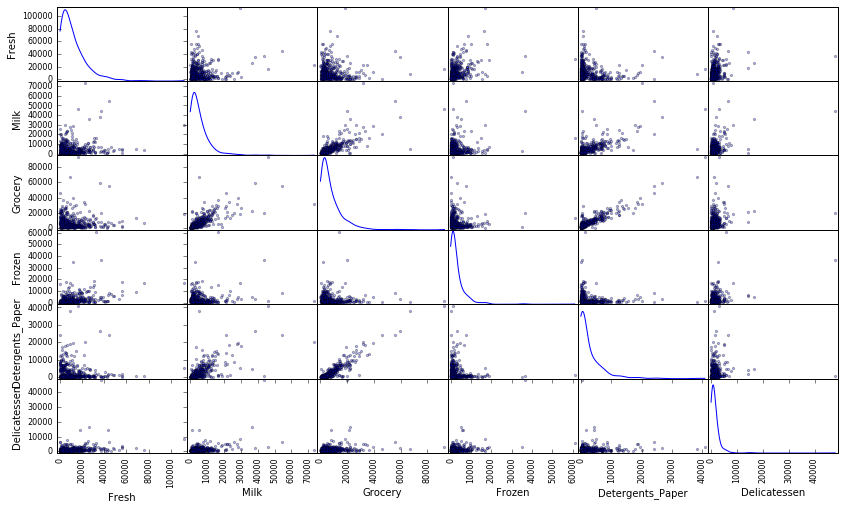

In [5]:
# Produce a scatter matrix for each pair of features in the data

pd.scatter_matrix(data, alpha = 0.3, figsize = (14,8), diagonal = 'kde');
data.corr()

### Question 3
*Are there any pairs of features which exhibit some degree of correlation? Does this confirm or deny your suspicions about the relevance of the feature you attempted to predict? How is the data for those features distributed?*  
**Hint:** Is the data normally distributed? Where do most of the data points lie? 

**Answer:**

Yes, you can see detergents paper and grocery almost forming a perfect diagonal line, they do form have a very high correlation (0.92). As for the attempted feature, you can see by the milk column that only milk with grocery seems to have a slight correlation between each other of around `0.72` and milk with detergents paper a correlation of around `0.66`, indicating they do bear some similarity but don't have any relevance when it comes to identifying specific customers. The distribution as you can see by the graphs on the diagonal all follow a similar right-tailed distribution, diverging only in the scale of the positive-tail. You can also see that milk and grocery have a lot of the data points distributed between 0 and 20k. Fresh has a more sparse data population, where most of the data lies between 0 and 60k. Furthermore, frozen, detergents paper and delicatessen all have a very concentrated data set, where most of their data lives between 0 and 10k. 

## Data Preprocessing
In this section, you will preprocess the data to create a better representation of customers by performing a scaling on the data and detecting (and optionally removing) outliers. Preprocessing data is often times a critical step in assuring that results you obtain from your analysis are significant and meaningful.

### Implementation: Feature Scaling
If data is not normally distributed, especially if the mean and median vary significantly (indicating a large skew), it is most [often appropriate](http://econbrowser.com/archives/2014/02/use-of-logarithms-in-economics) to apply a non-linear scaling — particularly for financial data. One way to achieve this scaling is by using a [Box-Cox test](http://scipy.github.io/devdocs/generated/scipy.stats.boxcox.html), which calculates the best power transformation of the data that reduces skewness. A simpler approach which can work in most cases would be applying the natural logarithm.

In the code block below, you will need to implement the following:
 - Assign a copy of the data to `log_data` after applying logarithmic scaling. Use the `np.log` function for this.
 - Assign a copy of the sample data to `log_samples` after applying logarithmic scaling. Again, use `np.log`.

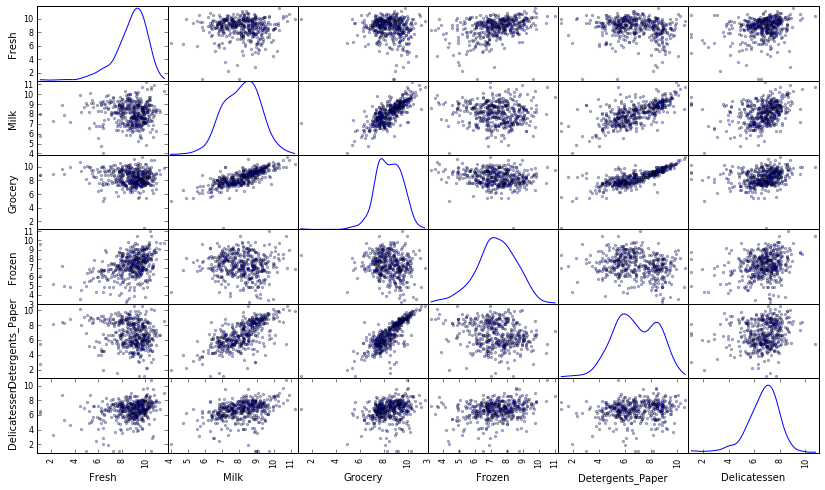

In [6]:
# TODO: Scale the data using the natural logarithm
log_data = np.log(data)

# TODO: Scale the sample data using the natural logarithm
log_samples = np.log(samples)

# Produce a scatter matrix for each pair of newly-transformed features
pd.scatter_matrix(log_data, alpha = 0.3, figsize = (14,8), diagonal = 'kde');

### Observation
After applying a natural logarithm scaling to the data, the distribution of each feature should appear much more normal. For any pairs of features you may have identified earlier as being correlated, observe here whether that correlation is still present (and whether it is now stronger or weaker than before).

Run the code below to see how the sample data has changed after having the natural logarithm applied to it.

In [7]:
# Display the log-transformed sample data
display(log_samples)

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
0,6.242223,9.026778,8.834774,6.270988,4.532599,6.946976
1,10.702480,10.901524,10.925417,8.959569,10.092909,8.774158
2,9.730502,6.833032,7.916807,9.355220,5.805135,8.156510


### Implementation: Outlier Detection
Detecting outliers in the data is extremely important in the data preprocessing step of any analysis. The presence of outliers can often skew results which take into consideration these data points. There are many "rules of thumb" for what constitutes an outlier in a dataset. Here, we will use [Tukey's Method for identfying outliers](http://datapigtechnologies.com/blog/index.php/highlighting-outliers-in-your-data-with-the-tukey-method/): An *outlier step* is calculated as 1.5 times the interquartile range (IQR). A data point with a feature that is beyond an outlier step outside of the IQR for that feature is considered abnormal.

In the code block below, you will need to implement the following:
 - Assign the value of the 25th percentile for the given feature to `Q1`. Use `np.percentile` for this.
 - Assign the value of the 75th percentile for the given feature to `Q3`. Again, use `np.percentile`.
 - Assign the calculation of an outlier step for the given feature to `step`.
 - Optionally remove data points from the dataset by adding indices to the `outliers` list.

**NOTE:** If you choose to remove any outliers, ensure that the sample data does not contain any of these points!  
Once you have performed this implementation, the dataset will be stored in the variable `good_data`.

In [11]:
all_outliers = []
# For each feature find the data points with extreme high or low values
for feature in log_data.keys():
  
    # TODO: Calculate Q1 (25th percentile of the data) for the given feature
    Q1 = np.percentile(log_data[feature], 25)
    
    # TODO: Calculate Q3 (75th percentile of the data) for the given feature
    Q3 = np.percentile(log_data[feature], 75)
    
    # TODO: Use the interquartile range to calculate an outlier step (1.5 times the interquartile range)
    step = 1.5 * (Q3 - Q1)
    
    outliers = log_data[~((log_data[feature] >= Q1 - step) & (log_data[feature] <= Q3 + step))]
    
    all_outliers.append(outliers.index.values)
    # Display the outliers
    print "Data points considered outliers for the feature '{}':".format(feature)
    display(outliers)

all_outliers = [item for sublist in all_outliers for item in sublist]

# OPTIONAL: Select the indices for data points you wish to remove
outliers = [86, 325, 183, 154, 66,75, 128, 65]
# Remove the outliers, if any were specified
good_data = log_data.drop(log_data.index[outliers]).reset_index(drop = True)

Data points considered outliers for the feature 'Fresh':


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
65,4.442651,9.950323,10.732651,3.583519,10.095388,7.260523
66,2.197225,7.335634,8.911530,5.164786,8.151333,3.295837
81,5.389072,9.163249,9.575192,5.645447,8.964184,5.049856
95,1.098612,7.979339,8.740657,6.086775,5.407172,6.563856
96,3.135494,7.869402,9.001839,4.976734,8.262043,5.379897
128,4.941642,9.087834,8.248791,4.955827,6.967909,1.098612
171,5.298317,10.160530,9.894245,6.478510,9.079434,8.740337
193,5.192957,8.156223,9.917982,6.865891,8.633731,6.501290
218,2.890372,8.923191,9.629380,7.158514,8.475746,8.759669
304,5.081404,8.917311,10.117510,6.424869,9.374413,7.787382


Data points considered outliers for the feature 'Milk':


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
86,10.039983,11.205013,10.377047,6.894670,9.906981,6.805723
98,6.220590,4.718499,6.656727,6.796824,4.025352,4.882802
154,6.432940,4.007333,4.919981,4.317488,1.945910,2.079442
356,10.029503,4.897840,5.384495,8.057377,2.197225,6.306275


Data points considered outliers for the feature 'Grocery':


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
75,9.923192,7.036148,1.098612,8.390949,1.098612,6.882437
154,6.432940,4.007333,4.919981,4.317488,1.945910,2.079442


Data points considered outliers for the feature 'Frozen':


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
38,8.431853,9.663261,9.723703,3.496508,8.847360,6.070738
57,8.597297,9.203618,9.257892,3.637586,8.932213,7.156177
65,4.442651,9.950323,10.732651,3.583519,10.095388,7.260523
145,10.000569,9.034080,10.457143,3.737670,9.440738,8.396155
175,7.759187,8.967632,9.382106,3.951244,8.341887,7.436617
264,6.978214,9.177714,9.645041,4.110874,8.696176,7.142827
325,10.395650,9.728181,9.519735,11.016479,7.148346,8.632128
420,8.402007,8.569026,9.490015,3.218876,8.827321,7.239215
429,9.060331,7.467371,8.183118,3.850148,4.430817,7.824446
439,7.932721,7.437206,7.828038,4.174387,6.167516,3.951244


Data points considered outliers for the feature 'Detergents_Paper':


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
75,9.923192,7.036148,1.098612,8.390949,1.098612,6.882437
161,9.428190,6.291569,5.645447,6.995766,1.098612,7.711101


Data points considered outliers for the feature 'Delicatessen':


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
66,2.197225,7.335634,8.911530,5.164786,8.151333,3.295837
109,7.248504,9.724899,10.274568,6.511745,6.728629,1.098612
128,4.941642,9.087834,8.248791,4.955827,6.967909,1.098612
137,8.034955,8.997147,9.021840,6.493754,6.580639,3.583519
142,10.519646,8.875147,9.018332,8.004700,2.995732,1.098612
154,6.432940,4.007333,4.919981,4.317488,1.945910,2.079442
183,10.514529,10.690808,9.911952,10.505999,5.476464,10.777768
184,5.789960,6.822197,8.457443,4.304065,5.811141,2.397895
187,7.798933,8.987447,9.192075,8.743372,8.148735,1.098612
203,6.368187,6.529419,7.703459,6.150603,6.860664,2.890372


### Question 4
*Are there any data points considered outliers for more than one feature based on the definition above? Should these data points be removed from the dataset? If any data points were added to the `outliers` list to be removed, explain why.* 

**Answer:**

Yes, there are a few datapoints that are listed as outliers for a number of features, such as 154, 66, 75, 128 and 65. These datapoints should be removed from the dataset, since they are inferred as outliers for more than 1 feature, increasing its chance to mess with the overall analysis and make the data more noisy. I have tried to select the most diparse datapoint filtered based on that particular feature. So, if you take a look at `Fresh` feature, I havent picked any of the datapoints because there does not seem to have one or a few specific outliers, they seem to be very evenly distributed around the same range. But, if you look at `Milk`, datapoint 86 is the one I picked, since it varies 7 points from the other 2 outliers. By looking at the `Frozen` table I noticed that the datapoint 325 had a very large difference in value compared to the rest of the outliers filtered for that feature. Finally, by looking at the `Delicatessen` feature table, I noticed that the feature 183 is a lot larger than the rest of the other datapoints.

By removing this datapoints, I am reducing the amount of variability there are in the data, making it easier for PCA to cover the larger amount of variance in the data with less dimensions. In addition of that, it is important to note that by removing the outliers we correctly reduce the optimal number of clusters this data has from 3 to 2 (this will be discussed on the [Creating Clusters](http://localhost:8888/notebooks/customer_segments.ipynb#Implementation:-Creating-Clusters) secion later. 

## Feature Transformation
In this section you will use principal component analysis (PCA) to draw conclusions about the underlying structure of the wholesale customer data. Since using PCA on a dataset calculates the dimensions which best maximize variance, we will find which compound combinations of features best describe customers.

### Implementation: PCA

Now that the data has been scaled to a more normal distribution and has had any necessary outliers removed, we can now apply PCA to the `good_data` to discover which dimensions about the data best maximize the variance of features involved. In addition to finding these dimensions, PCA will also report the *explained variance ratio* of each dimension — how much variance within the data is explained by that dimension alone. Note that a component (dimension) from PCA can be considered a new "feature" of the space, however it is a composition of the original features present in the data.

In the code block below, you will need to implement the following:
 - Import `sklearn.decomposition.PCA` and assign the results of fitting PCA in six dimensions with `good_data` to `pca`.
 - Apply a PCA transformation of `log_samples` using `pca.transform`, and assign the results to `pca_samples`.

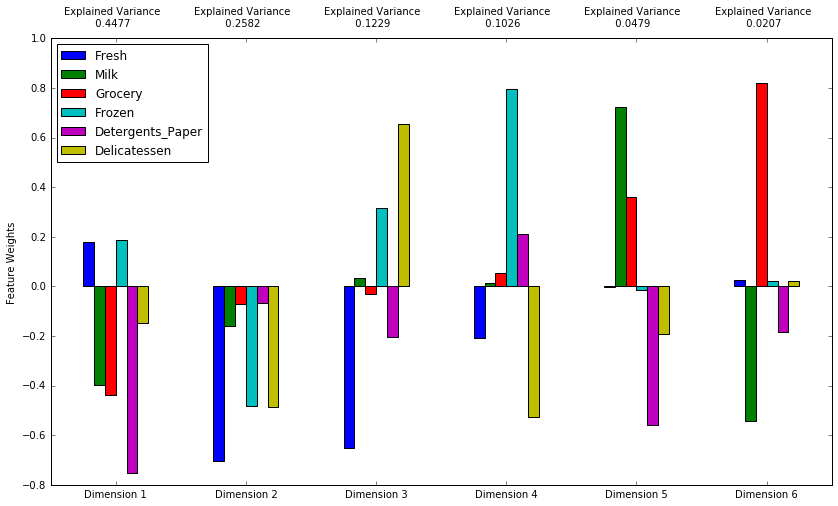

In [12]:
from sklearn.decomposition import PCA

# TODO: Apply PCA by fitting the good data with the same number of dimensions as features
pca = PCA(n_components=6).fit(good_data)

# TODO: Transform log_samples using the PCA fit above
pca_samples = pca.transform(log_samples)

# Generate PCA results plot
pca_results = vs.pca_results(good_data, pca)

In [13]:
pca_results

,Explained Variance,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
Dimension 1,0.4477,0.1792,-0.3958,-0.4368,0.1851,-0.7516,-0.1462
Dimension 2,0.2582,-0.7049,-0.1591,-0.0701,-0.4818,-0.0677,-0.4860
Dimension 3,0.1229,-0.6533,0.0335,-0.0289,0.3181,-0.2055,0.6541
Dimension 4,0.1026,-0.2084,0.0118,0.0545,0.7948,0.2105,-0.5267
Dimension 5,0.0479,-0.0029,0.7240,0.3587,-0.0155,-0.5570,-0.1916
Dimension 6,0.0207,0.0273,-0.5410,0.8197,0.0225,-0.1838,0.0225


### Question 5
*How much variance in the data is explained* ***in total*** *by the first and second principal component? What about the first four principal components? Using the visualization provided above, discuss what the first four dimensions best represent in terms of customer spending.*  
**Hint:** A positive increase in a specific dimension corresponds with an *increase* of the *positive-weighted* features and a *decrease* of the *negative-weighted* features. The rate of increase or decrease is based on the indivdual feature weights.

**Answer:**

The first and the second component amount to a total of 0.7094 variance, and the first four, to a total of 0.9321 variance.

By what I understood about PCA and the intuition I could get from this graph, I noticed that on the first dimension, a good number of customers that buy `Detergents_paper`, also buy `Grocery` and `Milk`, you can also see a similarity between `Frozen` and `Fresh` buyers that starts to show off itself on the first dimension, but really shines on the second, where you can see the feature weights  similarity that they also happen to share with `Delicatessen` buyers. Moving on, you can then see that from the third dimension on, things start to get more disperse, but you can still see that some `Fresh` and `Detergents_paper` buyers share some negative-weighted features, on the other hand, `Frozen` and `Delicatessen` share some positive-weighted features. When we get to the fourth dimension, we can see that there are still some subset of the data that can capture some variance between the fetaures, such as `Fresh` & `Delicatessen` and `Detergents_paper` & `Frozen`.

1st Dimesnsion:

Looks like the first dimension is capturing the high correlation detergents paper has with grocery, and not far behind the grocery and milk similarity. It gives a relatively high weight for detergents paper weights (-0.7511) and about half of that value to grocery (-0.4401) and milk(-0.3952). Based on the large importance of those 3 features, it is somewhat safe to speculate that this dimension captures some subset of the cafes represented in the data.


2nd Dimension:

Second dimension dominant features are fresh (-0.6157), delicatessen (-0.5471) and frozen (-0.5357). So, it is important to note that the customers belonging to this dimension all seem to buy a similar amount of these 3 products, but also buy a smaller amount, but still buy some of the other stuff, as all weights on this dimension ar negatively weighted. Looks like this dimension is capturing those customers that buy a good amount of everything, such as markets and retailers.

3rd Dimension:

Third dimension's main positively weighted features are fresh (0.3830), frozen (0.3477) and detergents paper (0.2816). On the other hand, the only negatively weighted feature is delicatessen (-0.8037). What this shows us, is that these customers have a tendendy of buying a similar amount of those 3 positively weighted features, therefore they got a similar weight in importance, whereas the delicatessen purchase may vary a lot between them, so it has a very high negative weight, but its still a very important feature for this dimension. This demonstrates that this dimension could be capturing restaurantes that have a similar kind of menu when it comes to frozen and fresh food, and also have a similar usage of detergents paper. But on the other hand, the delicatessen they buy shines a light on the difference between their menus, where some will buy a specific amount and others will buy another.


4th Dimension:

The fourth dimension has 2 main feature weights, where 1 is negatively high (frozen -0.7461), and the other is positively high (fresh 0.6632). This indicates that the customers here buy a very different amount of frozen and fresh foods, which indicates that when one buys fresh it wont buy much frozen, and vice-versa. This could indicate the different markets there are out there, ones which sell more frozen foods, and others that sell more fresh foods. 




### Observation
Run the code below to see how the log-transformed sample data has changed after having a PCA transformation applied to it in six dimensions. Observe the numerical value for the first four dimensions of the sample points. Consider if this is consistent with your initial interpretation of the sample points.

In [14]:
# Display sample log-data after having a PCA transformation applied
display(pd.DataFrame(np.round(pca_samples, 4), columns = pca_results.index.values))

,Dimension 1,Dimension 2,Dimension 3,Dimension 4,Dimension 5,Dimension 6
0,0.4876,2.1233,1.9706,-0.8865,2.0324,0.1500
1,-4.3166,-4.0254,-0.0332,0.6650,0.6380,0.0509
2,1.8196,-2.0823,1.1554,0.3926,-0.8835,0.5423


### Implementation: Dimensionality Reduction
When using principal component analysis, one of the main goals is to reduce the dimensionality of the data — in effect, reducing the complexity of the problem. Dimensionality reduction comes at a cost: Fewer dimensions used implies less of the total variance in the data is being explained. Because of this, the *cumulative explained variance ratio* is extremely important for knowing how many dimensions are necessary for the problem. Additionally, if a signifiant amount of variance is explained by only two or three dimensions, the reduced data can be visualized afterwards.

In the code block below, you will need to implement the following:
 - Assign the results of fitting PCA in two dimensions with `good_data` to `pca`.
 - Apply a PCA transformation of `good_data` using `pca.transform`, and assign the results to `reduced_data`.
 - Apply a PCA transformation of `log_samples` using `pca.transform`, and assign the results to `pca_samples`.

In [15]:
# TODO: Apply PCA by fitting the good data with only two dimensions
pca = PCA(n_components=2).fit(good_data)

# TODO: Transform the good data using the PCA fit above
reduced_data = pca.transform(good_data)

# TODO: Transform log_samples using the PCA fit above
pca_samples = pca.transform(log_samples)

# Create a DataFrame for the reduced data
reduced_data = pd.DataFrame(reduced_data, columns = ['Dimension 1', 'Dimension 2'])

### Observation
Run the code below to see how the log-transformed sample data has changed after having a PCA transformation applied to it using only two dimensions. Observe how the values for the first two dimensions remains unchanged when compared to a PCA transformation in six dimensions.

In [16]:
# Display sample log-data after applying PCA transformation in two dimensions
display(pd.DataFrame(np.round(pca_samples, 4), columns = ['Dimension 1', 'Dimension 2']))

,Dimension 1,Dimension 2
0,0.4876,2.1233
1,-4.3166,-4.0254
2,1.8196,-2.0823


## Visualizing a Biplot
A biplot is a scatterplot where each data point is represented by its scores along the principal components. The axes are the principal components (in this case `Dimension 1` and `Dimension 2`). In addition, the biplot shows the projection of the original features along the components. A biplot can help us interpret the reduced dimensions of the data, and discover relationships between the principal components and original features.

Run the code cell below to produce a biplot of the reduced-dimension data.

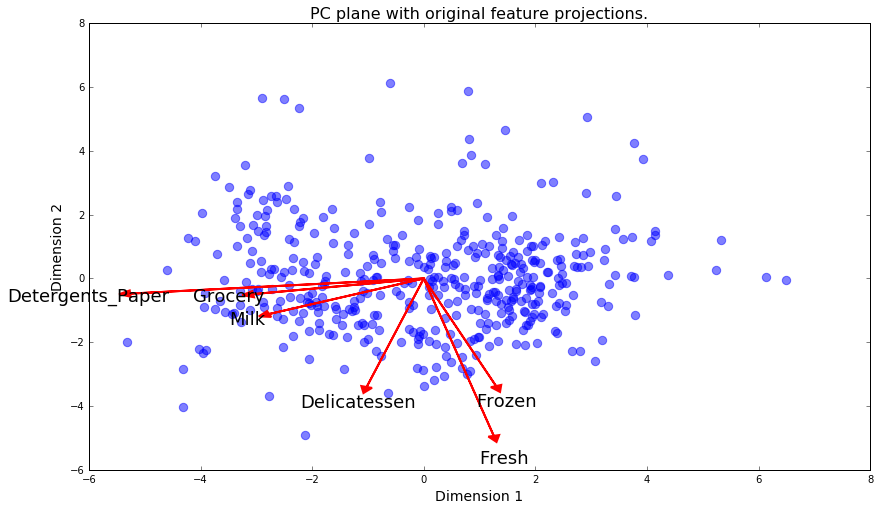

In [17]:
# Create a biplot
vs.biplot(good_data, reduced_data, pca)

### Observation

Once we have the original feature projections (in red), it is easier to interpret the relative position of each data point in the scatterplot. For instance, a point the lower right corner of the figure will likely correspond to a customer that spends a lot on `'Milk'`, `'Grocery'` and `'Detergents_Paper'`, but not so much on the other product categories. 

From the biplot, which of the original features are most strongly correlated with the first component? What about those that are associated with the second component? Do these observations agree with the pca_results plot you obtained earlier?

## Clustering

In this section, you will choose to use either a K-Means clustering algorithm or a Gaussian Mixture Model clustering algorithm to identify the various customer segments hidden in the data. You will then recover specific data points from the clusters to understand their significance by transforming them back into their original dimension and scale. 

### Question 6
*What are the advantages to using a K-Means clustering algorithm? What are the advantages to using a Gaussian Mixture Model clustering algorithm? Given your observations about the wholesale customer data so far, which of the two algorithms will you use and why?*

**Answer:**


- K-Means executes what is called a hard assignment, it allocates a cluster to a point every single iteration the algorithm does. On the other hand, Gaussian Mixture Models (GMM) executes what we call soft assignment, it allocates a probability that a given point belongs to a cluster, allowing the point to have probablitly of say 50% of being in cluster A, 10% of being in cluster B and 40% of being in cluster C, it allows for us to code this uncertainty into the iterations.
- The K-Means clustering algorithm has a good performance (linear), and it is always guaranteed to converge on a solution. 
- The Gaussian Mixture Model clustering algorithm (Expectation maximization), has the advantage that for each iteration that the algorithm runs, it is generally increasing the likelihood that the clustering are properly converging. However, it does present the danger of never converging, but that is not a problem, since it practically does, as it will get to a point that the change is so subtle that it wont be making any more difference, so it will practically converge. Another interesting property of this algorithm, is that it will never diverge from the right answer, given good data. Also, another very important advantage is that it works with any distribution, if the expectation and maximization are solvable.
- By observing the biplot graph above, I could notice that we can't infer a distribution of the data simply by looking at it, so it becomes hard to initialize k-means with the amount of clusters needed. Also, the PCA dimension 1 and 2 ploted above, clearly demonstrates that the clusters around them are not circular or creating shape of any form, which happens to not be so good for k-means that does not converge well when there are unusual shapes on the data, proving that using a mixture model clustering is a better idea than just a simple k-means. In addition of that, the gaussian mixture model takes into consideration the information about the covariance structure of the data, matching well with the metric PCA was trying to optimize.

### Implementation: Creating Clusters
Depending on the problem, the number of clusters that you expect to be in the data may already be known. When the number of clusters is not known *a priori*, there is no guarantee that a given number of clusters best segments the data, since it is unclear what structure exists in the data — if any. However, we can quantify the "goodness" of a clustering by calculating each data point's *silhouette coefficient*. The [silhouette coefficient](http://scikit-learn.org/stable/modules/generated/sklearn.metrics.silhouette_score.html) for a data point measures how similar it is to its assigned cluster from -1 (dissimilar) to 1 (similar). Calculating the *mean* silhouette coefficient provides for a simple scoring method of a given clustering.

In the code block below, you will need to implement the following:
 - Fit a clustering algorithm to the `reduced_data` and assign it to `clusterer`.
 - Predict the cluster for each data point in `reduced_data` using `clusterer.predict` and assign them to `preds`.
 - Find the cluster centers using the algorithm's respective attribute and assign them to `centers`.
 - Predict the cluster for each sample data point in `pca_samples` and assign them `sample_preds`.
 - Import `sklearn.metrics.silhouette_score` and calculate the silhouette score of `reduced_data` against `preds`.
   - Assign the silhouette score to `score` and print the result.

In [18]:
from sklearn.mixture import GaussianMixture
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

def run_silhouette(n):
  for i in range(n):
    if i == 0: continue
    clusterer = GaussianMixture(n_components=i + 1, random_state=random_state)
    clusterer.fit(reduced_data)
    preds = clusterer.predict(reduced_data)
    score = silhouette_score(reduced_data, preds)
    bic = clusterer.bic(reduced_data)
    print "N: " + str(i + 1) 
    print "Silhouette Score: " + str(score)
    print "BIC: " + str(bic)
    print
      
# TODO: Apply your clustering algorithm of choice to the reduced data 
clusterer = GaussianMixture(n_components=2, random_state=random_state)
#clusterer = KMeans(n_clusters=2, random_state=random_state)
clusterer.fit(reduced_data)

# TODO: Predict the cluster for each data point
preds = clusterer.predict(reduced_data)

# TODO: Find the cluster centers
centers = clusterer.means_
#centers = clusterer.cluster_centers_


# TODO: Predict the cluster for each transformed sample data point
sample_preds = clusterer.predict(pca_samples)

# TODO: Calculate the mean silhouette coefficient for the number of clusters chosen
score = silhouette_score(reduced_data, preds)
bic = clusterer.bic(reduced_data)
run_silhouette(20)

N: 2
Silhouette Score: 0.423493226882
BIC: 3523.06025829

N: 3
Silhouette Score: 0.40673386833
BIC: 3528.95663213

N: 4
Silhouette Score: 0.352251787096
BIC: 3554.77884494

N: 5
Silhouette Score: 0.316308644047
BIC: 3567.33973006

N: 6
Silhouette Score: 0.335860311788
BIC: 3592.32662252

N: 7
Silhouette Score: 0.214578190762
BIC: 3599.03964041

N: 8
Silhouette Score: 0.326003197341
BIC: 3633.23953201

N: 9
Silhouette Score: 0.30224955111
BIC: 3657.41861769

N: 10
Silhouette Score: 0.327993770818
BIC: 3683.28492074

N: 11
Silhouette Score: 0.248836462516
BIC: 3720.4936215

N: 12
Silhouette Score: 0.335824890908
BIC: 3754.77280793

N: 13
Silhouette Score: 0.329367287717
BIC: 3782.63873528

N: 14
Silhouette Score: 0.323956609969
BIC: 3807.95195105

N: 15
Silhouette Score: 0.32720202553
BIC: 3838.0652022

N: 16
Silhouette Score: 0.336689919326
BIC: 3873.87578111

N: 17
Silhouette Score: 0.311954892323
BIC: 3901.731505

N: 18
Silhouette Score: 0.312866864394
BIC: 3934.99456636

N: 19
Silhou

### Question 7
*Report the silhouette score for several cluster numbers you tried. Of these, which number of clusters has the best silhouette score?* 

**Answer:**

The best score comes with 2 clusters. I have tried with both `KMeans` and `GaussianMixture` and they both behave similarly, with a silhouette score of approximately 0.42 when 2 clusters are selected.

This only happens due to the removal of the outliers on a section above. If, for any reason, had I not removed the outliers, the most optimal number of clusters would be 3. 

### Cluster Visualization
Once you've chosen the optimal number of clusters for your clustering algorithm using the scoring metric above, you can now visualize the results by executing the code block below. Note that, for experimentation purposes, you are welcome to adjust the number of clusters for your clustering algorithm to see various visualizations. The final visualization provided should, however, correspond with the optimal number of clusters. 

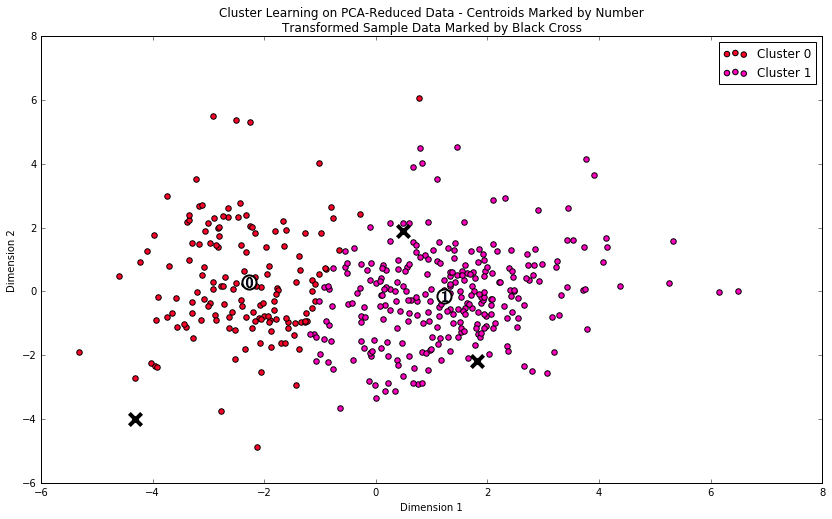

In [121]:
# Display the results of the clustering from implementation
vs.cluster_results(reduced_data, preds, centers, pca_samples)

### Implementation: Data Recovery
Each cluster present in the visualization above has a central point. These centers (or means) are not specifically data points from the data, but rather the *averages* of all the data points predicted in the respective clusters. For the problem of creating customer segments, a cluster's center point corresponds to *the average customer of that segment*. Since the data is currently reduced in dimension and scaled by a logarithm, we can recover the representative customer spending from these data points by applying the inverse transformations.

In the code block below, you will need to implement the following:
 - Apply the inverse transform to `centers` using `pca.inverse_transform` and assign the new centers to `log_centers`.
 - Apply the inverse function of `np.log` to `log_centers` using `np.exp` and assign the true centers to `true_centers`.


In [29]:
# TODO: Inverse transform the centers
log_centers = pca.inverse_transform(centers)

# TODO: Exponentiate the centers
true_centers = np.exp(log_centers)

# Display the true centers
segments = ['Segment {}'.format(i) for i in range(0,len(centers))]
true_centers = pd.DataFrame(np.round(true_centers), columns = data.keys())
true_centers.index = segments
display(true_centers)


# Inverse reduced data to get the statistical description of the data without the outliers
log_data = pca.inverse_transform(reduced_data)
true_data = np.exp(log_data)
true_data = pd.DataFrame(np.round(true_data), columns = data.keys())
display(true_data.describe())

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
Segment 0,3322.0,7791.0,12365.0,832.0,4845.0,943.0
Segment 1,8951.0,2124.0,2790.0,2039.0,364.0,728.0


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
count,432.000000,432.000000,432.000000,432.000000,432.000000,432.000000
mean,11323.069444,4852.386574,7125.284722,2051.108796,2812.740741,1116.694444
std,13504.853859,4696.193949,7033.686105,1602.068878,5015.195962,1128.400765
min,71.000000,257.000000,276.000000,58.000000,7.000000,41.000000
25%,3682.250000,1741.250000,2296.500000,992.250000,265.000000,464.750000
50%,7171.500000,3162.500000,4301.500000,1646.000000,774.500000,818.500000
75%,13930.750000,6724.750000,10538.500000,2651.750000,3582.250000,1467.250000
max,137126.000000,37500.000000,54742.000000,10686.000000,55385.000000,11764.000000


### Question 8
Consider the total purchase cost of each product category for the representative data points above, and reference the statistical description of the dataset at the beginning of this project. *What set of establishments could each of the customer segments represent?*  
**Hint:** A customer who is assigned to `'Cluster X'` should best identify with the establishments represented by the feature set of `'Segment X'`.

**Answer:**

Cluster 0:
- The first segment appears to be customers that buys a significant amount of milk, grocery and detergents paper. All these product categories are higher than the average and 75% of all the data,  therefore indicating this is a type of business that goes through a significant runway of such products. Further down, you can notice that delicatessen products, while low in absolute value it still is significant, especially when noting that the overall purchases of such goods are low, it just beats 50% of all the data and is somewhat close to the mean. This segment appears to contain a set of establishments that goes through a high number of different kinds of products, perfect fit for retailers, markets and supermarkets. These businesses whole busniess models rely on selling large quantities of products and gaining a profit on the margin they get because they **can** sell products at a **(sometimes) larger** and more **diverse** scale.


Cluster 1:
- The second segment clients' products all have its value lower than the average of its respective category. In addition to that, milk, grocery, frozen, detergents paper and delicatessen are within the same distribution of in between 25% and 50% of the data on each category. Meaning, this set of establishments dont buy a very high amount of most of the categories. The only category that differs a little is fresh products, which lie within the range of 50% and 75%. In addition to that, its important to note the low amount of detergents paper this segment buys, which could mean this sort of departments only buys it for internal use, and not for re-selling it, which would require larger purchases. These sort of customers fit well with the needs of restaurants and cafes, because these establishments would usually not need to buy as much in absolute quantity as markets and retailers would have to, matching the statistical description of the data. 


### Question 9
*For each sample point, which customer segment from* ***Question 8*** *best represents it? Are the predictions for each sample point consistent with this?*

Run the code block below to find which cluster each sample point is predicted to be.

In [36]:
# Display the predictions
for i, pred in enumerate(sample_preds):
    print "Sample point", i, "predicted to be in Cluster", pred

display(true_centers)
display(samples)

Sample point 0 predicted to be in Cluster 1
Sample point 1 predicted to be in Cluster 0
Sample point 2 predicted to be in Cluster 1


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
Segment 0,3322.0,7791.0,12365.0,832.0,4845.0,943.0
Segment 1,8951.0,2124.0,2790.0,2039.0,364.0,728.0


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
0,514,8323,6869,529,93,1040
1,44466,54259,55571,7782,24171,6465
2,16823,928,2743,11559,332,3486


**Answer:**

If number 1 represents the group that belongs to the restaurants and cafes, and number 0 represents the markets/retailers, then yes, the predictions went accordingly with my intuition. In addition to that, if I am correct, it also enforces the conjectures made on question 1, where I stated that Sample 0 was a cafe, sample 1 a market/retailer and sample 2 is a restaurant of some sort. 


## Conclusion

In this final section, you will investigate ways that you can make use of the clustered data. First, you will consider how the different groups of customers, the ***customer segments***, may be affected differently by a specific delivery scheme. Next, you will consider how giving a label to each customer (which *segment* that customer belongs to) can provide for additional features about the customer data. Finally, you will compare the ***customer segments*** to a hidden variable present in the data, to see whether the clustering identified certain relationships.

### Question 10
Companies will often run [A/B tests](https://en.wikipedia.org/wiki/A/B_testing) when making small changes to their products or services to determine whether making that change will affect its customers positively or negatively. The wholesale distributor is considering changing its delivery service from currently 5 days a week to 3 days a week. However, the distributor will only make this change in delivery service for customers that react positively. *How can the wholesale distributor use the customer segments to determine which customers, if any, would react positively to the change in delivery service?*  
**Hint:** Can we assume the change affects all customers equally? How can we determine which group of customers it affects the most?

**Answer:**

By understanding the customer segments of the business, the wholesale distributor will be able to analyse the day-to-day activities of his/her clients' business, and realize whether if for their business model it is beneficial faster delivery, or not. On the other hand, if this information is not available, and the distributor does not have the frequency of purchase of each customer and what segment he/she belongs to, then he/she will be left alone to guess whether this will have a fundamental impact on their customers' business or not.

The impact on the segment that have restaurants and cafes included could be either really good or indiferent. Since, it will depend on how busy each establishment is, if the restaurant is busy and tends to buy from other places because waiting 5 days is too long to get the next delivery in, then this might have a dramatic impact and help them grow their business. On the other hand, if the restaurant/cafe is not so busy and a 5 day delivery time is not so bad, then we expect to not see much of a change in their behavior.

Similarly, the impact on retailers will depend upon how much they sell and if we as a current supplier can handle their demands, inciting a similar consequence to that of cafes/restaurants. In which, if this is a fundamental problem those customers are having on their day-to-day operations, where due to our slow delivery we were missing on the opportunity of selling more, then this shall have a very positive impact on those customers. However, if those customers do not have much of a need for faster delivery, it does not look like this will solve much of their problems. 

First of all, we have to look at the characteristics of the proposed change:

- This change would certainly have a lot of operational overhead that would have to be dealt with it
- It would be quite expensive to roll a test out for a lot of people and then have to roll it back because it did not show the expected results.
- Differents kinds of customers will be affected differently based on their business needs. 

Taking into consideration the above assertions about the task at hand, we can then start to formulate some split tests to help us gain an insight into wether we are really helping improve the life of our customers or not.
When formulating these tests, the process I would follow would be:
1. Randomly select 20% of the population, where 50% of those belong to Cluster A and the other 50% to Cluster B;
2. Run the test where this users are being tested on the 3-day delivery. 
3. Leave the test running for a few weeks;
4. Pull the numbers and analyse how the faster delivery affected user behavior on each segment;
5. How has delivering 2 days faster affected user of both segments behavior? Did any of them respond positively? Any negatively?
6. Analyse the results from this test, keep the new system for those who responded positively, roll it back for those who responded negatively and maintain the test running for those who did not change its behavior at all.
7. Randomly select another subset of the population and run another test.
8. Re run points 2 to 6.
9. Decide whether the confidence on the results of the test is high enough. If yes, jump to next point. If not, go back to point 7.
10. Roll the new delivery system to the population that behaved well and hold it back from those that behaved negatively.

### Question 11
Additional structure is derived from originally unlabeled data when using clustering techniques. Since each customer has a ***customer segment*** it best identifies with (depending on the clustering algorithm applied), we can consider *'customer segment'* as an **engineered feature** for the data. Assume the wholesale distributor recently acquired ten new customers and each provided estimates for anticipated annual spending of each product category. Knowing these estimates, the wholesale distributor wants to classify each new customer to a ***customer segment*** to determine the most appropriate delivery service.  
*How can the wholesale distributor label the new customers using only their estimated product spending and the* ***customer segment*** *data?*  
**Hint:** A supervised learner could be used to train on the original customers. What would be the target variable?

**Answer:**

A supervised learner, such as a Desision Tree, could be used to train on the data of all the current customers that have all been properly classified to each segment they belong. And then the estimation data given by the new customer would be inputed into the training algorithm as a proxy for the missing historical data. From then on, the supervised learner could predict which customer segment this new client belongs to.

### Visualizing Underlying Distributions

At the beginning of this project, it was discussed that the `'Channel'` and `'Region'` features would be excluded from the dataset so that the customer product categories were emphasized in the analysis. By reintroducing the `'Channel'` feature to the dataset, an interesting structure emerges when considering the same PCA dimensionality reduction applied earlier to the original dataset.

Run the code block below to see how each data point is labeled either `'HoReCa'` (Hotel/Restaurant/Cafe) or `'Retail'` the reduced space. In addition, you will find the sample points are circled in the plot, which will identify their labeling.

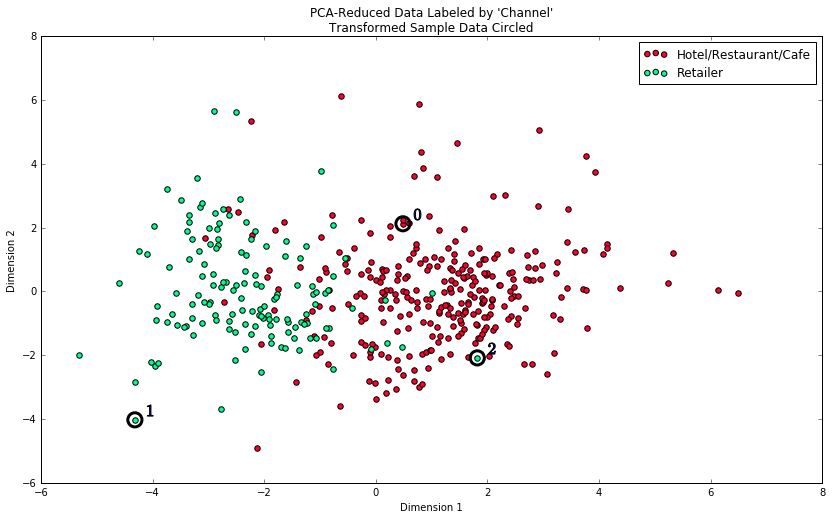

In [38]:
# Display the clustering results based on 'Channel' data
vs.channel_results(reduced_data, outliers, pca_samples)

### Question 12
*How well does the clustering algorithm and number of clusters you've chosen compare to this underlying distribution of Hotel/Restaurant/Cafe customers to Retailer customers? Are there customer segments that would be classified as purely 'Retailers' or 'Hotels/Restaurants/Cafes' by this distribution? Would you consider these classifications as consistent with your previous definition of the customer segments?*

**Answer:**

The clustering algorithm and number of clusters compare really well to the actual segment distribution, since the result we arrived at the end was 2 clusters, and the majority of points would be correctly labeled to its proper line of business. However, you can see that there are quite a few Hotels/Restaurants/Cafes points that would be incorrectly classified as retailers. On the flip side, there are also some points that are labeled as retailers that would be incorrectly classified as Hotels/Restaurants/Cafes, including one of the earlier sampled points (2).

Yes, based on my earlier analysis, customer segment 0 would be classified as retailers, though I also used the word market and supermarkets. On the other hand, customer segments 1 were only classified as Restaurants/Cafes, the Hotel part was left out of the analysis. 

> **Note**: Once you have completed all of the code implementations and successfully answered each question above, you may finalize your work by exporting the iPython Notebook as an HTML document. You can do this by using the menu above and navigating to  
**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission.